In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [39]:
data = pd.read_csv('data.csv')
imputed_data_caliber = pd.read_csv('imputed_data_caliber_c.csv')
imputed_data_mice = pd.read_csv('imputed_data_mice_c.csv')
imputed_data_mixgb = pd.read_csv('imputed_data_mixgb.csv')
imputed_data_missforest = pd.read_csv('imputed_data_missforest.csv')
data_missing = pd.read_csv('data_missing.csv')
data_to_use = data.drop(['V2'], axis=1)
data_missing_imputed = data_missing.fillna(data_missing.mean())

In [43]:
imputed_datasets = {
    'caliber': imputed_data_caliber,
    'mice': imputed_data_mice,
    'mixgb': imputed_data_mixgb,
    'missforest': imputed_data_missforest,
    'none': data_to_use,
    'mean': data_missing_imputed
}

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def calculate_specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

def run_classification_models(data, target):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=123)
    models = {'Logistic Regression': LogisticRegression(), 'Random Forest Classifier': RandomForestClassifier(), 'SVM': SVC()}
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {'Accuracy': accuracy_score(y_test, y_pred), 'Sensitivity': recall_score(y_test, y_pred), 'Specificity': calculate_specificity(y_test, y_pred), 'Precision': precision_score(y_test, y_pred), 'F1 Score': f1_score(y_test, y_pred)}
    return results

V2 = data['V2']
all_results = {}

for name, dataset in imputed_datasets.items():
    all_results[name] = run_classification_models(dataset, V2)

# Convert results to DataFrame for visualization
df_results = pd.DataFrame()
for impute_method, models_results in all_results.items():
    for model_name, metrics in models_results.items():
        for metric, value in metrics.items():
            df_results = df_results.append({'Imputation Method': impute_method, 'Model': model_name, 'Metric': metric, 'Value': value}, ignore_index=True)

# # Plotting
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Metric', y='Value', hue='Imputation Method', data=df_results)
# plt.title('Comparison of Classification Models Across Imputation Methods')
# plt.show()
# Function to create plots for each model



C:\Users\Chungeun Lee\AppData\Local\Temp\ipykernel_23996\1708464715.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Imputation Method': impute_method, 'Model': model_name, 'Metric': metric, 'Value': value}, ignore_index=True)
C:\Users\Chungeun Lee\AppData\Local\Temp\ipykernel_23996\1708464715.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Imputation Method': impute_method, 'Model': model_name, 'Metric': metric, 'Value': value}, ignore_index=True)
C:\Users\Chungeun Lee\AppData\Local\Temp\ipykernel_23996\1708464715.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'Imputation Method': impute_method, 'Model': model_n

In [57]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_results)

   Imputation Method                     Model       Metric     Value
0            caliber       Logistic Regression     Accuracy  0.947368
1            caliber       Logistic Regression  Sensitivity  0.875000
2            caliber       Logistic Regression  Specificity  0.992857
3            caliber       Logistic Regression    Precision  0.987179
4            caliber       Logistic Regression     F1 Score  0.927711
5            caliber  Random Forest Classifier     Accuracy  0.934211
6            caliber  Random Forest Classifier  Sensitivity  0.897727
7            caliber  Random Forest Classifier  Specificity  0.957143
8            caliber  Random Forest Classifier    Precision  0.929412
9            caliber  Random Forest Classifier     F1 Score  0.913295
10           caliber                       SVM     Accuracy  0.951754
11           caliber                       SVM  Sensitivity  0.886364
12           caliber                       SVM  Specificity  0.992857
13           caliber

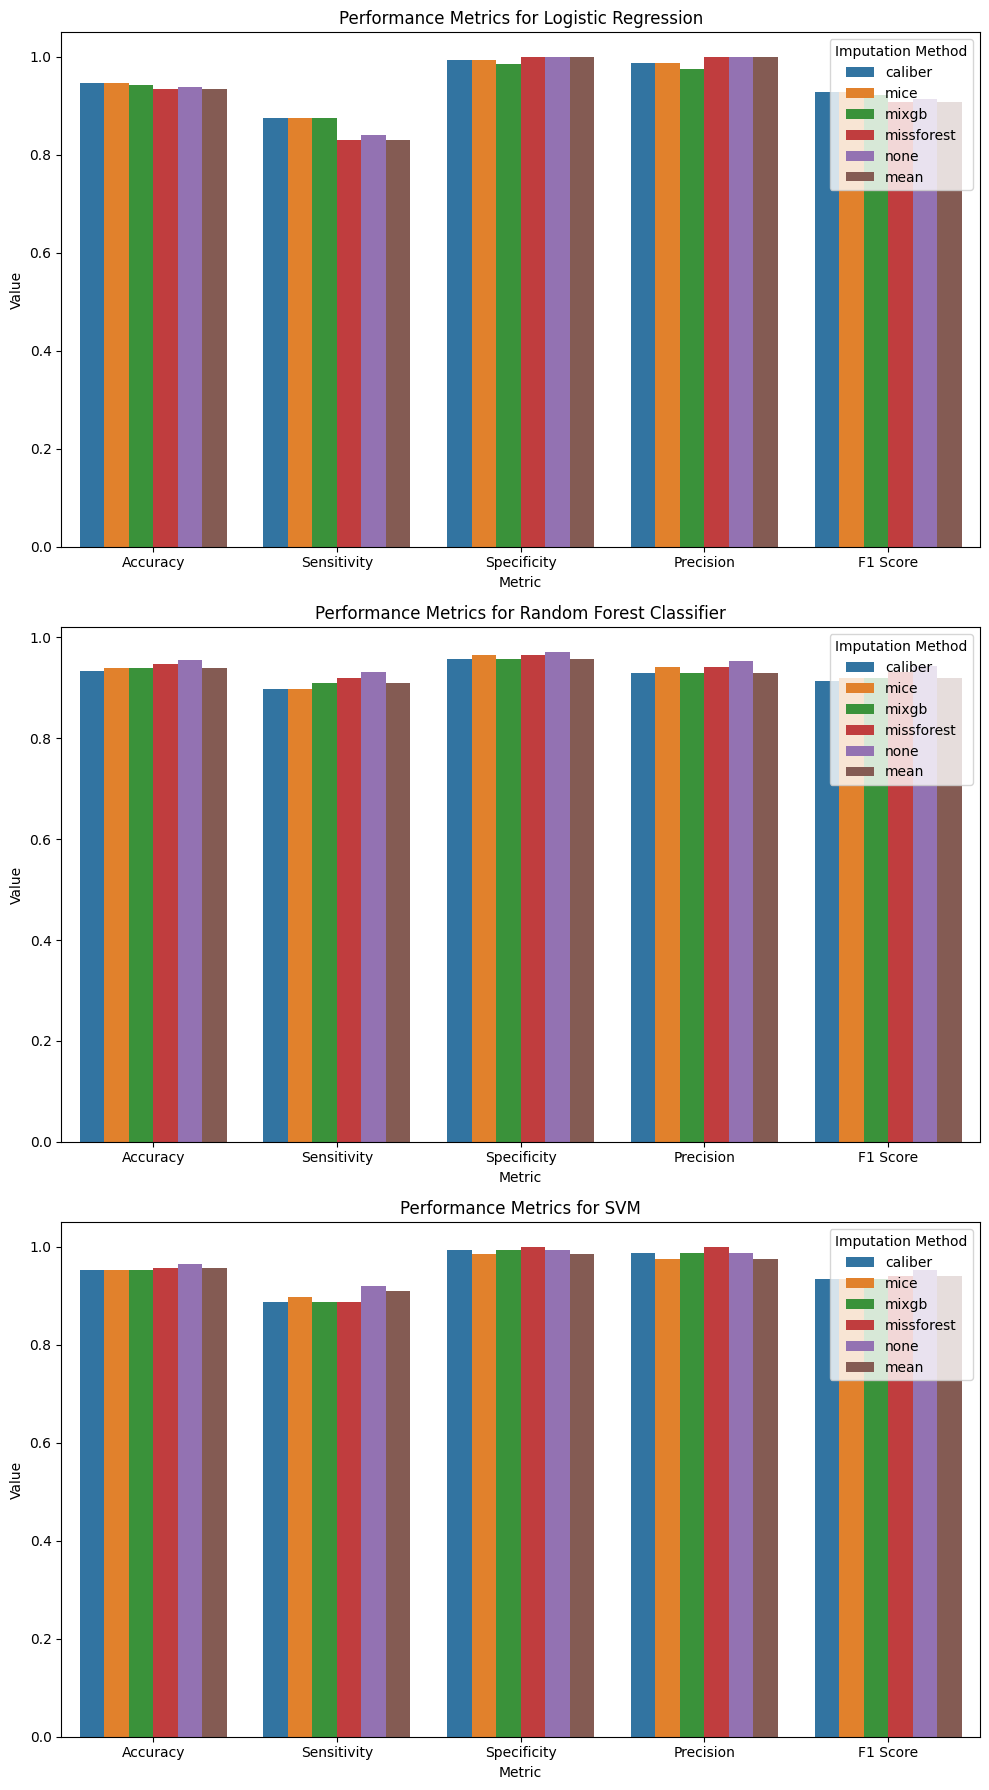

In [59]:
# Create a single figure with subplots for each model
fig, axes = plt.subplots(nrows=len(df_results['Model'].unique()), ncols=1, figsize=(10, 18))

# Function to create plots for each model
def create_plot(model_name, ax):
    model_df = df_results[df_results['Model'] == model_name]
    sns.barplot(x='Metric', y='Value', hue='Imputation Method', data=model_df, ax=ax)
    ax.set_title(f'Performance Metrics for {model_name}')

# Generate plots in subplots
for i, model in enumerate(df_results['Model'].unique()):
    create_plot(model, axes[i])

plt.tight_layout()
plt.savefig('real_c_comparison_plot.png')
plt.show()
